In [1]:
#!pip install nba-api
#!pip install requests
#!pip install seaborn

from nba_api.stats.endpoints import playercareerstats
import matplotlib.pyplot as plt
from nba_api.stats.static import players
import seaborn as sns

In [2]:
def player_ppg(player_name):
    data = players.find_players_by_full_name(player_name)
    # Get the first dictionary in the list
    first_dict = data[0]

    # Get the first key-value pair
    _, id_val = list(first_dict.items())[0]
    # Get the first key-value pair
    _, name_val = list(first_dict.items())[1]
    
    career = playercareerstats.PlayerCareerStats(player_id=str(id_val)) 
    player_df = career.get_data_frames()[0]
    player_df["PPG"] = player_df["PTS"] / player_df["GP"]

    fig, ax = plt.subplots()

    bars = ax.bar(player_df["SEASON_ID"].values,player_df["PPG"].values)
    for bar in bars:
        yval = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom')
    ax.set_xlabel("Seasons")
    ax.set_ylabel("Points per game")

    ax.set_title(f"{name_val}´s PPG during regular season")    
    
    plt.xticks(rotation=80)

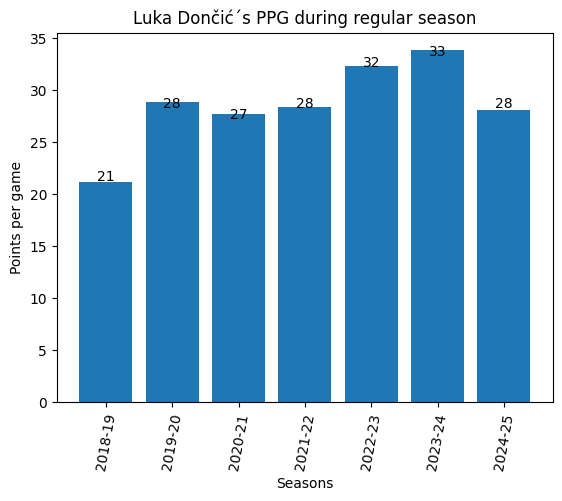

In [7]:
player_ppg("Doncic")

In [9]:
# Find players by full name.
data = players.find_players_by_full_name('Derrick Rose')

# Get the first dictionary in the list
first_dict = data[0]
print(first_dict)

# Get the first key-value pair
id_key, id_val = list(first_dict.items())[0]

print(f"First key: {id_key}")
print(f"First value: {id_val}")

# D-Rose
career = playercareerstats.PlayerCareerStats(player_id=str(id_val)) 


# pandas data frames (optional: pip install pandas)
player_df = career.get_data_frames()[0]


{'id': 201565, 'full_name': 'Derrick Rose', 'first_name': 'Derrick', 'last_name': 'Rose', 'is_active': False}
First key: id
First value: 201565


In [10]:
player_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201565,2008-09,00,1610612741,CHI,20.0,81,80,3000.0,574,...,0.788,96,221,317,512,66,18,202,125,1361
1,201565,2009-10,00,1610612741,CHI,21.0,78,78,2871.0,672,...,0.766,65,228,293,469,57,27,217,96,1619
2,201565,2010-11,00,1610612741,CHI,22.0,81,81,3026.0,711,...,0.858,81,249,330,623,85,51,278,136,2026
3,201565,2011-12,00,1610612741,CHI,23.0,39,39,1375.0,302,...,0.812,26,105,131,307,35,28,119,52,852
4,201565,2013-14,00,1610612741,CHI,25.0,10,10,311.0,58,...,0.844,9,23,32,43,5,1,34,15,159


In [11]:
from nba_api.live.nba.endpoints import scoreboard

# Today's Score Board
games = scoreboard.ScoreBoard()

In [13]:
# dictionary
games.get_dict()

{'meta': {'version': 1,
  'request': 'https://nba-prod-us-east-1-mediaops-stats.s3.amazonaws.com/NBA/liveData/scoreboard/todaysScoreboard_00.json',
  'time': '2025-01-21 03:28:43.2843',
  'code': 200},
 'scoreboard': {'gameDate': '2025-01-21',
  'leagueId': '00',
  'leagueName': 'National Basketball Association',
  'games': [{'gameId': '0022400606',
    'gameCode': '20250121/NYKBKN',
    'gameStatus': 1,
    'gameStatusText': '7:30 pm ET',
    'period': 0,
    'gameClock': '',
    'gameTimeUTC': '2025-01-22T00:30:00Z',
    'gameEt': '2025-01-21T19:30:00Z',
    'regulationPeriods': 4,
    'ifNecessary': False,
    'seriesGameNumber': '',
    'gameLabel': '',
    'gameSubLabel': '',
    'seriesText': '',
    'seriesConference': '',
    'poRoundDesc': '',
    'gameSubtype': '',
    'homeTeam': {'teamId': 1610612751,
     'teamName': 'Nets',
     'teamCity': 'Brooklyn',
     'teamTricode': 'BKN',
     'wins': 14,
     'losses': 29,
     'score': 0,
     'seed': None,
     'inBonus': None,


In [15]:
import requests
import pandas as pd

url = 'https://stats.nba.com/stats/leaguedashplayerstats'
headers = {
    'referer': 'https://www.nba.com/',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'
    }

payload = {
'College': '',
'Conference': '',
'Country': '',
'DateFrom': '',
'DateTo': '',
'Division': '',
'DraftPick': '',
'DraftYear': '',
'GameScope': '',
'GameSegment': '',
'Height': '',
'ISTRound': '',
'LastNGames': '0',
'LeagueID': '00',
'Location': '',
'MeasureType': 'Advanced',
'Month': '0',
'OpponentTeamID': '0',
'Outcome': '',
'PORound': '0',
'PaceAdjust': 'N',
'PerMode': 'PerGame',
'Period': '0',
'PlayerExperience': '',
'PlayerPosition': '',
'PlusMinus': 'N',
'Rank': 'N',
'Season': '2023-24',
'SeasonSegment': '',
'SeasonType': 'Playoffs',
'ShotClockRange': '',
'StarterBench': '',
'TeamID': '0',
'VsConference': '',
'VsDivision': '',
'Weight': '',
    }

jsonData = requests.get(url, headers=headers, params=payload).json()

columns = jsonData['resultSets'][0]['headers']
rows = jsonData['resultSets'][0]['rowSet']

df = pd.DataFrame(rows, columns=columns)

In [16]:
df.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,23.0,10,7,3,0.700,...,106,204,105,105,127,149,153,179,193,90
1,1631260,AJ Green,AJ,1610612749,MIL,24.0,6,2,4,0.333,...,166,17,25,25,184,138,137,139,143,147
2,203932,Aaron Gordon,Aaron,1610612743,DEN,28.0,12,7,5,0.583,...,126,131,143,143,58,28,39,43,58,27
3,1630174,Aaron Nesmith,Aaron,1610612754,IND,24.0,17,8,9,0.471,...,130,95,137,137,152,38,30,71,72,104
4,1630598,Aaron Wiggins,Aaron,1610612760,OKC,25.0,10,6,4,0.600,...,95,81,100,100,59,82,90,100,111,59


In [17]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats, playergamelog
import pandas as pd
import datetime

# Get a list of all NBA players
nba_players = players.get_players()

# Initialize a list to store player seasons
player_seasons = []

# Initialize a list to store game logs for players with 1.2 steals per game
player_game_logs = []

# Iterate through the list of players
for player in nba_players:
    player_id = player['id']
    player_name = player['full_name']

    print(f"Processing {player_name}...")  # Print the player name

    # Retrieve player career statistics
    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id)

    # Get the DataFrame of player career stats
    career_stats_df = career_stats.get_data_frames()[0]

    # Set the steals per game
    SPG = 1

    # Filter seasons with the desired steals per game
    filtered_seasons = career_stats_df[career_stats_df['STL'] == SPG]

    if not filtered_seasons.empty:
        player_seasons.append(filtered_seasons)
        print(f"{player_name} has {len(filtered_seasons)} season(s) with {SPG} steal(s) per game.")

        # Iterate through the filtered seasons and fetch game logs
        for season in filtered_seasons['SEASON_ID']:
            game_log = playergamelog.PlayerGameLog(player_id=player_id, season=season)
            game_log_df = game_log.get_data_frames()[0]
            player_game_logs.append(game_log_df)

# Check if there is data to concatenate
if player_seasons:
    # Concatenate the filtered DataFrames
    result_seasons_df = pd.concat(player_seasons, ignore_index=True)
    result_game_logs_df = pd.concat(player_game_logs, ignore_index=True)

    # Find games where players recorded 0 steals
    zero_steals_games = result_game_logs_df[result_game_logs_df['STL'] == 0]

    # Count the total number of games with 0 steals
    total_zero_steals_games = len(zero_steals_games)

    # Print the result
    print(f"Total games with 0 steals: {total_zero_steals_games}")
else:
    print("No data to concatenate. No players meet the criteria.")

Processing Alaa Abdelnaby...
Processing Zaid Abdul-Aziz...
Zaid Abdul-Aziz has 1 season(s) with 1 steal(s) per game.
Processing Kareem Abdul-Jabbar...
Processing Mahmoud Abdul-Rauf...
Processing Tariq Abdul-Wahad...
Processing Shareef Abdur-Rahim...
Shareef Abdur-Rahim has 1 season(s) with 1 steal(s) per game.
Processing Tom Abernethy...
Tom Abernethy has 1 season(s) with 1 steal(s) per game.
Processing Forest Able...
Processing John Abramovic...
Processing Alex Abrines...
Processing Precious Achiuwa...
Processing Alex Acker...
Alex Acker has 1 season(s) with 1 steal(s) per game.
Processing Donald Ackerman...
Processing Mark Acres...
Processing Charles Acton...
Processing Quincy Acy...
Quincy Acy has 1 season(s) with 1 steal(s) per game.
Processing Alvan Adams...
Processing Don Adams...
Processing Hassan Adams...
Hassan Adams has 1 season(s) with 1 steal(s) per game.
Processing Jaylen Adams...
Processing Jordan Adams...
Processing Michael Adams...
Processing Steven Adams...
Processing 

ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)